In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
data = pd.read_csv("hh_final_merged.csv")

In [ ]:
data

,id,title,description,avg_salary,currency,employer,city,search_query,employment,remote,published_at,url
0,127202494,ML-аналитик / Data Scientist,"Уверенное владение Python, pandas, scikit-lear...",NaN,NaN,ЮНИСТРИМ БАНК,Москва,data scientist,Полная занятость,Очная,2025-11-01T09:09:01+0300,https://hh.ru/vacancy/127202494
1,127139735,Junior Data Scientist,"Знание Python и ключевых библиотек (Pandas, Sc...",NaN,NaN,IDF Eurasia,Москва,data scientist,Полная занятость,Удалённая,2025-10-30T12:17:23+0300,https://hh.ru/vacancy/127139735
2,126209623,"Стажер, Data Analyst / Data Scientist","Знания реляционных баз данных (SQL, ER диаграм...",NaN,NaN,Kept (Кэпт),Москва,data scientist,Полная занятость,Гибрид,2025-10-06T18:43:16+0300,https://hh.ru/vacancy/126209623
3,126311801,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,RUR,Bgstaff,Москва,data scientist,Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
4,126984712,Data Scientist,"Высшее образование (техническое, математическо...",NaN,NaN,АДВ,Москва,data scientist,Полная занятость,Гибрид,2025-10-27T12:41:12+0300,https://hh.ru/vacancy/126984712
...,...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,RUR,ГК Планета Авто,Челябинск,senior системный администратор,Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,125938955,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,RUR,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,126696734,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,RUR,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,124687789,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,RUR,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39613 entries, 0 to 39612
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            39613 non-null  int64  
 1   title         39613 non-null  object 
 2   description   39613 non-null  object 
 3   avg_salary    21088 non-null  float64
 4   currency      21390 non-null  object 
 5   employer      39613 non-null  object 
 6   city          39613 non-null  object 
 7   search_query  39613 non-null  object 
 8   employment    39613 non-null  object 
 9   remote        39613 non-null  object 
 10  published_at  39613 non-null  object 
 11  url           39613 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 3.6+ MB


Заметим, что None есть только в колонках с зарплатой и валютой соответственно, их чуть меньше 50%, но удалим все None, чтобы не искажать данные, потому что для проекта надо найти наиболее четкую зарплатную вилку.

In [ ]:
data_clean= data.dropna()
data_clean


,id,title,description,avg_salary,currency,employer,city,search_query,employment,remote,published_at,url
3,126311801,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,RUR,Bgstaff,Москва,data scientist,Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,126718438,Data Scientist (Junior),"Высшее образование (математическое, техническо...",100000.0,RUR,BND LLC,Москва,data scientist,Полная занятость,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...",Понимание принципов машинного обучения и стати...,90000.0,RUR,Rubbles,Москва,data scientist,Полная занятость,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,126970916,Ведущий разработчик искусственного интеллекта/...,Опыт работы: от 1 года. - Высшее физико-матема...,180000.0,RUR,Геномед,Москва,data scientist,Полная занятость,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,127181192,Data Scientist,Опыт работы на позиции <highlighttext>Data</hi...,325000.0,RUR,LIAN,Москва,data scientist,Полная занятость,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,RUR,ГК Планета Авто,Челябинск,senior системный администратор,Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,125938955,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,RUR,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,126696734,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,RUR,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,124687789,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,RUR,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


In [ ]:
#data_clean['remote'].unique()
#data_clean[data_clean['remote']=='Да']
data_clean['remote'].value_counts()
data_clean['employment'].value_counts()
data_clean['city'].value_counts()
data_clean['avg_salary'].nunique()
data_clean['avg_salary'].min()
data_clean[data_clean['avg_salary']<1000]

,id,title,description,avg_salary,currency,employer,city,search_query,employment,remote,published_at,url
2850,126744616,Ассистент / Аналитик / Product Manager / Марке...,Уверенный пользователь ПК. Предпочтение кандид...,600.0,RUR,Профит,Москва,аналитик данных,Частичная занятость,Очная,2025-11-01T17:05:05+0300,https://hh.ru/vacancy/126744616
7225,126880936,Backend-разработчик (RAG-система / AI / API),"Обеспечить логирование и метрики (скорость, ре...",1.5,RUR,Anton Butov,Москва,AI developer,Частичная занятость,Удалённая,2025-10-23T15:14:47+0300,https://hh.ru/vacancy/126880936
7818,126155736,Промоутер,"Мы ищем активных, улыбчивых и ответственных пр...",750.0,RUR,Сократика,Москва,искусственный интеллект,Частичная занятость,Очная,2025-10-06T07:58:53+0300,https://hh.ru/vacancy/126155736
15820,126171655,Универсальный веб-разработчик,Языки и СУБД: Уверенное владение PHP (для Bitr...,600.0,RUR,Seojazz,Москва,javascript developer,Полная занятость,Удалённая,2025-11-02T11:06:55+0300,https://hh.ru/vacancy/126171655
18473,126258896,Офис-менеджер (Подработка),Опыт от года. Знание иностранных языков. Знани...,478.0,RUR,Avanta Россия,Москва,1С,Частичная занятость,Очная,2025-10-21T12:15:24+0300,https://hh.ru/vacancy/126258896
18691,126795076,Специалист по кадрам,Уверенная работа в <highlighttext>1С</highligh...,700.0,RUR,FinHH,Москва,1С,Частичная занятость,Удалённая,2025-10-21T18:23:55+0300,https://hh.ru/vacancy/126795076
21052,125788028,Временный секретарь офиса / секретарь на ресепшен,"...замену в любой день, кроме сб и вс. Опыт от...",690.0,RUR,Avanta Россия,Москва,senior 1С,Проектная работа,Очная,2025-10-29T10:15:48+0300,https://hh.ru/vacancy/125788028
28497,126884665,Менеджер по маркетплейсам (ФБО поставки),Опыт работы с системами учета остатков и интег...,425.0,RUR,Цитадель,Санкт-Петербург,1С,Частичная занятость,Удалённая,2025-11-01T16:20:16+0300,https://hh.ru/vacancy/126884665
28523,126349430,Помощник руководителя швейного производства,Навык работы в <highlighttext>1с</highlighttex...,350.0,RUR,OSOME 2 SOME,Санкт-Петербург,1С,Частичная занятость,Очная,2025-10-09T10:57:25+0300,https://hh.ru/vacancy/126349430
33815,126291328,Администратор фитнес клуба,"Внимательность, пунктуальность, ответственност...",195.0,RUR,Колумб,Новосибирск,1С,Полная занятость,Очная,2025-10-08T10:06:58+0300,https://hh.ru/vacancy/126291328


Можем заметить, что удаленки всего 35 вакансий, из 21000, также есть выбросы в зарплате. Около 2к одинаковых описаний из 21к


In [ ]:
#data_clean['currency'].unique()
data_clean2 = data_clean.drop('currency', axis=1)
data_clean2

,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,url
3,126311801,Системный аналитик,"Высшее образование: ИТ, Технические специально...",400000.0,Bgstaff,Москва,data scientist,Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,126718438,Data Scientist (Junior),"Высшее образование (математическое, техническо...",100000.0,BND LLC,Москва,data scientist,Полная занятость,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...",Понимание принципов машинного обучения и стати...,90000.0,Rubbles,Москва,data scientist,Полная занятость,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,126970916,Ведущий разработчик искусственного интеллекта/...,Опыт работы: от 1 года. - Высшее физико-матема...,180000.0,Геномед,Москва,data scientist,Полная занятость,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,127181192,Data Scientist,Опыт работы на позиции <highlighttext>Data</hi...,325000.0,LIAN,Москва,data scientist,Полная занятость,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,"...сервера IP-телефонии FreePBX, SQL-серверов)...",115000.0,ГК Планета Авто,Челябинск,senior системный администратор,Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,125938955,Ведущий системный администратор,"Знание принципов работы протоколов TCP/IP, про...",100000.0,Уральский Комплектующий Завод,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,126696734,Ведущий инженер отдела информационных технологий,Высшее профессиональное образование в сфере ин...,70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,124687789,Системный администратор (ведущий инженер отдел...,Компетенции (что должен знать и уметь). - знат...,55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,senior системный администратор,Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


он не нужен. Просто пишет про валюту

In [ ]:
import re
data_clean=data_clean2
#data_clean
key_disc=[[] for _ in range(len(data_clean))]
mask_programming=[
        'python', 'pandas', 'numpy', 'scikit-learn', 'pytorch', 'tensorflow',
        'java', 'spring', 'hibernate', 'c++', 'golang', 'javascript', 'typescript',
        'react', 'vue', 'php', 'laravel', 'bitrix', 'rest api', 'graphql', 'fastapi', 'flask'
        ]
mask_ml=[
        'machine learning', 'ml', 'data science', 'deep learning', 'нейросет',
        'computer vision', 'cv', 'nlp', 'llm', 'gpt', 'transformer', 'ai',
        'рекомендательн', 'временные ряды', 'feature engineering', 'машинное обучение'
    ]
mask_dataeng=[
        'etl', 'elt', 'airflow', 'data pipeline', 'big data', 'hadoop', 'spark',
        'data warehouse', 'data lake', 'dwh', 'data vault', 'kafka', 'rabbitmq',
        'clickhouse', 'greenplum', 'data engineering'
    ]
mask_analytics=[
        'sql', 'power bi', 'tableau', 'datalens', 'superset', 'bi ', 'dashboard',
        'статистик', 'a/b тест', 'метрик', 'kpi', 'отчетность', 'аналитик',
        'data analyst', 'business intelligence'
    ]
mask_devops=[
        'docker', 'kubernetes', 'k8s', 'ci/cd', 'devops', 'monitoring',
        'prometheus', 'grafana', 'git', 'terraform', 'ansible', 'инфраструктур'
    ]
mask_hard=[
        'fintech', 'банк', 'e-commerce', 'маркетинг', 'реклам', 'медицин',
        'healthcare', 'кредитн', 'скоринг', 'retail', 'ритейл', 'телеком',
        'computer vision', 'recommendation', 'recommender'
    ]
mask_soft=[
        'data-driven', 'аналитическ', 'коммуникац', 'управлен', 'project management',
        'team', 'команд', 'лидерств', 'soft skills', 'гибк', 'адаптив'
    ]
mask_management = [
    'менеджер', 'manager', 'руководитель', 'team lead', 'тимлид', 'lead',
    'управление', 'управлен', 'project manager', 'продакт', 'product manager',
    'руководств', 'директор', 'director', 'head of', 'chief'
]

mask_sales = [
    'продаж', 'sales', 'коммерц', 'commercial', 'account manager', 'аккаунт',
    'менеджер по продажам', 'business development', 'развитие бизнеса',
    'клиентск', 'customer', 'партнер', 'partner', 'сейлз'
]

mask_hr = [
    'рекрутер', 'recruiter', 'hr', 'human resources', 'кадр', 'персонал',
    'подбор персонала', 'талант', 'talent', 'hr-', 'эйчар'
]

mask_design = [
    'дизайн', 'design', 'ui/', 'ux/', 'figma', 'photoshop', 'illustrator',
    'графическ', 'graphic', 'веб-дизайн', 'web design', 'дизайнер'
]

mask_support = [
    'поддержк', 'support', 'helpdesk', 'help desk', 'техническ', 'technical',
    'администрирован', 'administration', 'sysadmin', 'сисадмин'
]

mask_marketing = [
    'маркетинг', 'marketing', 'smm', 'смм', 'контент', 'content', 'копирайтер',
    'copywriter', 'трафик', 'traffic', 'продвижен', 'promotion', 'brand'
]

mask_qa = [
    'тестировщ', 'qa', 'quality assurance', 'контроль качеств', 'testing',
    'тестирован', 'test engineer', 'qa engineer'
]
def check_elements(deff, mask):
    for element in mask:
        if element in deff:
            return True
    return False
for i in range(len(data_clean['description'])):
  defenition=data_clean['description'].iloc[i].lower()
  if check_elements(defenition, mask_programming):
    key_disc[i].append('programming')
  if check_elements(defenition, mask_ml):
    key_disc[i].append('ml')
  if check_elements(defenition, mask_dataeng):
    key_disc[i].append('dataeng')
  if check_elements(defenition, mask_analytics):
    key_disc[i].append('analytics')
  if check_elements(defenition, mask_devops):
    key_disc[i].append('devops')
  if check_elements(defenition, mask_hard):
    key_disc[i].append('hard')
  if check_elements(defenition, mask_soft):
    key_disc[i].append('soft')
  if check_elements(defenition, mask_management):
      key_disc[i].append('management')
  if check_elements(defenition, mask_sales):
      key_disc[i].append('sales')
  if check_elements(defenition, mask_hr):
      key_disc[i].append('hr')
  if check_elements(defenition, mask_design):
      key_disc[i].append('design')
  if check_elements(defenition, mask_support):
      key_disc[i].append('support')
  if check_elements(defenition, mask_marketing):
      key_disc[i].append('marketing')
  if check_elements(defenition, mask_qa):
      key_disc[i].append('qa')
print(key_disc)

[['analytics', 'soft', 'support'], ['programming', 'ml', 'support'], ['programming', 'ml', 'analytics', 'soft'], ['ml', 'analytics', 'hard', 'support'], ['ml', 'dataeng'], ['hr'], ['hard'], ['programming', 'sales'], ['ml', 'soft', 'support'], ['ml', 'analytics', 'hard'], ['programming', 'ml', 'analytics', 'hard', 'sales', 'marketing'], ['ml', 'dataeng', 'support'], ['ml', 'analytics', 'soft', 'management'], ['ml'], ['programming', 'ml', 'hard'], ['programming', 'ml', 'analytics'], ['programming', 'ml'], ['programming', 'analytics', 'hard'], ['ml', 'analytics', 'soft', 'management', 'hr'], ['ml'], ['ml', 'support'], ['ml', 'analytics', 'support'], ['analytics', 'support'], ['analytics', 'support'], ['support'], ['analytics', 'support'], ['hard', 'management', 'sales', 'marketing'], ['soft', 'management'], ['programming', 'ml', 'support'], ['programming', 'analytics'], ['analytics', 'devops'], ['analytics', 'hard', 'sales', 'marketing'], ['analytics', 'sales'], ['analytics'], ['analytics

In [ ]:
data_clean['description']=key_disc
#data_clean
data_clean['search_query'].unique()

array(['data scientist', 'data analyst', 'data engineer',
       'аналитик данных', 'инженер данных', 'machine learning',
       'машинное обучение', 'ml engineer', 'AI developer',
       'искусственный интеллект', 'нейронные сети', 'computer vision',
       'big data', 'sql аналитик', 'bi analyst', 'product analyst',
       'junior аналитик данных', 'middle аналитик данных',
       'senior аналитик данных', 'middle инженер данных',
       'senior инженер данных', 'python developer', 'разработчик python',
       'junior python developer', 'middle python developer',
       'senior python developer', 'backend developer',
       'frontend developer', 'fullstack developer', 'java developer',
       'c# developer', 'c++ developer', 'javascript developer',
       'go developer', 'golang developer', 'kotlin developer',
       'системный администратор', '1С', 'программист 1С',
       'разработчик 1С', 'junior 1С', 'middle 1С', 'senior 1С',
       'junior data analyst', 'разработчик backend', '

In [ ]:
key_disc2=[[] for _ in range(len(data_clean))]
mask_data_science = [
    'data scientist', 'data analyst', 'аналитик данных', 'sql аналитик',
    'bi analyst', 'product analyst', 'junior аналитик данных',
    'middle аналитик данных', 'senior аналитик данных', 'middle data analyst',
    'senior data analyst'
]

mask_data_engineering = [
    'data engineer', 'инженер данных', 'big data', 'middle инженер данных',
    'senior инженер данных', 'senior data engineer', 'junior инженер данных'
]

mask_ai_ml = [
    'machine learning', 'машинное обучение', 'ml engineer', 'AI developer',
    'искусственный интеллект', 'нейронные сети', 'computer vision'
]

mask_python = [
    'python developer', 'разработчик python', 'junior python developer',
    'middle python developer', 'senior python developer'
]

mask_backend = [
    'backend developer', 'java developer', 'c# developer', 'c++ developer',
    'go developer', 'golang developer', 'kotlin developer'
]

mask_fullstack = [
    'fullstack developer', 'javascript developer'
]

mask_frontend = [
    'frontend developer'
]

mask_1c = [
    '1С', 'программист 1С', 'разработчик 1С', 'junior 1С',
    'middle 1С', 'senior 1С'
]

mask_admin = [
    'системный администратор'
]
for i in range(len(data_clean['search_query'])):
  defenition=data_clean['search_query'].iloc[i].lower()
  if check_elements(defenition, mask_data_science):
    key_disc2[i].append('data_science')
  if check_elements(defenition, mask_ai_ml):
    key_disc2[i].append('ai_ml')
  if check_elements(defenition, mask_python):
    key_disc2[i].append('python')
  if check_elements(defenition, mask_data_engineering):
    key_disc2[i].append('data_engineering')
  if check_elements(defenition, mask_backend):
    key_disc2[i].append('backend')
  if check_elements(defenition, mask_fullstack):
    key_disc2[i].append('fullstack')
  if check_elements(defenition, mask_frontend):
    key_disc2[i].append('frontend')
  if check_elements(defenition, mask_1c):
      key_disc2[i].append('1c')
  if check_elements(defenition, mask_admin):
      key_disc2[i].append('admin')
print(key_disc2)
data_clean['search_query']=key_disc2

[['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_science'], ['data_sc

In [ ]:
data_clean

,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,url
3,126311801,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,[data_science],Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801
5,126718438,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,[data_science],Полная занятость,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,[data_science],Полная занятость,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385
9,126970916,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,[data_science],Полная занятость,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916
14,127181192,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,[data_science],Полная занятость,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192
...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,[admin],Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010
39609,125938955,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,[admin],Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955
39610,126696734,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,[admin],Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734
39611,124687789,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,[admin],Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789


In [ ]:
data_clean['salary_level'] = pd.cut(
    data_clean['avg_salary'],
    bins=[0, 80000, 150000, 300000, 600000, 1000000, float('inf')],
    labels=['низкая', 'ниже средней', 'средняя', 'выше средней', 'высокая', 'топ']
)



In [ ]:
data_clean['search_query'] = data_clean['search_query'].explode()
data_clean

,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,url,salary_level
3,126311801,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,data_science,Полная занятость,Гибрид,2025-10-08T14:46:36+0300,https://hh.ru/vacancy/126311801,выше средней
5,126718438,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,data_science,Полная занятость,Гибрид,2025-11-01T11:21:52+0300,https://hh.ru/vacancy/126718438,ниже средней
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,data_science,Полная занятость,Удалённая,2025-10-28T14:15:12+0300,https://hh.ru/vacancy/127063385,ниже средней
9,126970916,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,data_science,Полная занятость,Удалённая,2025-10-27T10:56:35+0300,https://hh.ru/vacancy/126970916,средняя
14,127181192,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,data_science,Полная занятость,Удалённая,2025-10-31T13:29:30+0300,https://hh.ru/vacancy/127181192,выше средней
...,...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,admin,Полная занятость,Очная,2025-11-01T15:39:52+0300,https://hh.ru/vacancy/125639010,ниже средней
39609,125938955,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,admin,Полная занятость,Очная,2025-10-22T12:40:33+0300,https://hh.ru/vacancy/125938955,ниже средней
39610,126696734,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,admin,Полная занятость,Очная,2025-10-27T13:53:49+0300,https://hh.ru/vacancy/126696734,низкая
39611,124687789,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,admin,Полная занятость,Очная,2025-10-27T07:12:36+0300,https://hh.ru/vacancy/124687789,низкая


Классифицируем вакансии по уровню зарплаты

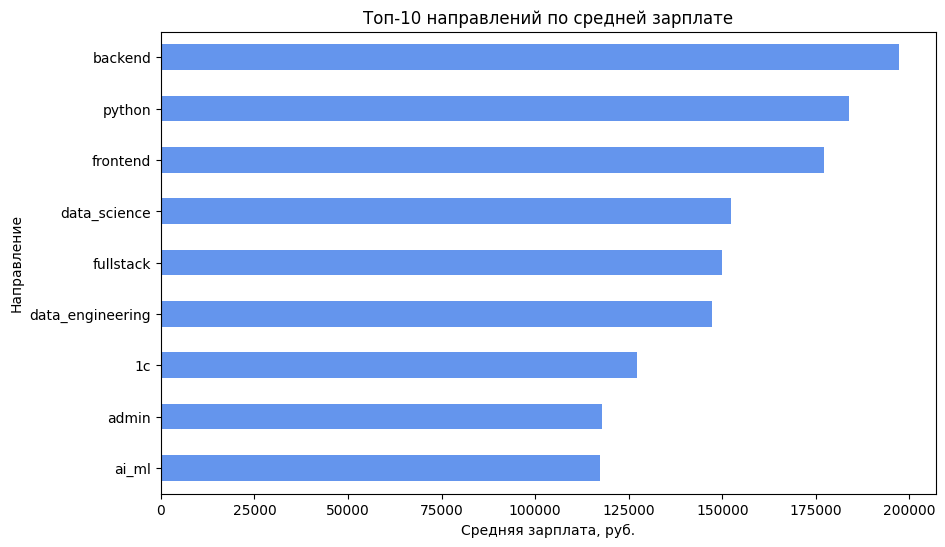

In [ ]:
data_clean['search_query'] = data_clean['search_query'].fillna('1c')
top_directions = (
data_clean.groupby('search_query')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_directions.plot(kind='barh', color='cornflowerblue')
plt.title('Топ-10 направлений по средней зарплате')
plt.xlabel('Средняя зарплата, руб.')
plt.ylabel('Направление')
plt.gca().invert_yaxis()
plt.show()

На данном графике показаны самые высокооплачиваемые направления

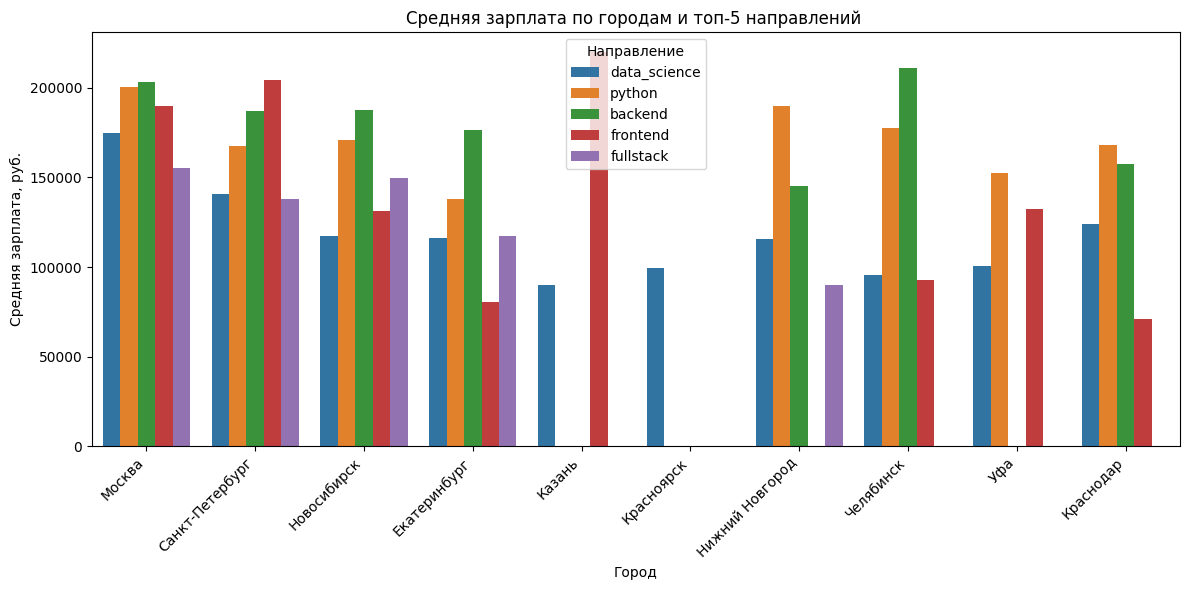

In [ ]:
top_dirs = (
    data_clean.groupby('search_query')['avg_salary']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

filtered = data_clean[data_clean['search_query'].isin(top_dirs)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=filtered,
    x='city',
    y='avg_salary',
    hue='search_query',
    estimator='mean',
    errorbar=None
)
plt.title('Средняя зарплата по городам и топ-5 направлений ')
plt.xlabel('Город')
plt.ylabel('Средняя зарплата, руб.')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Направление')
plt.tight_layout()
plt.show()

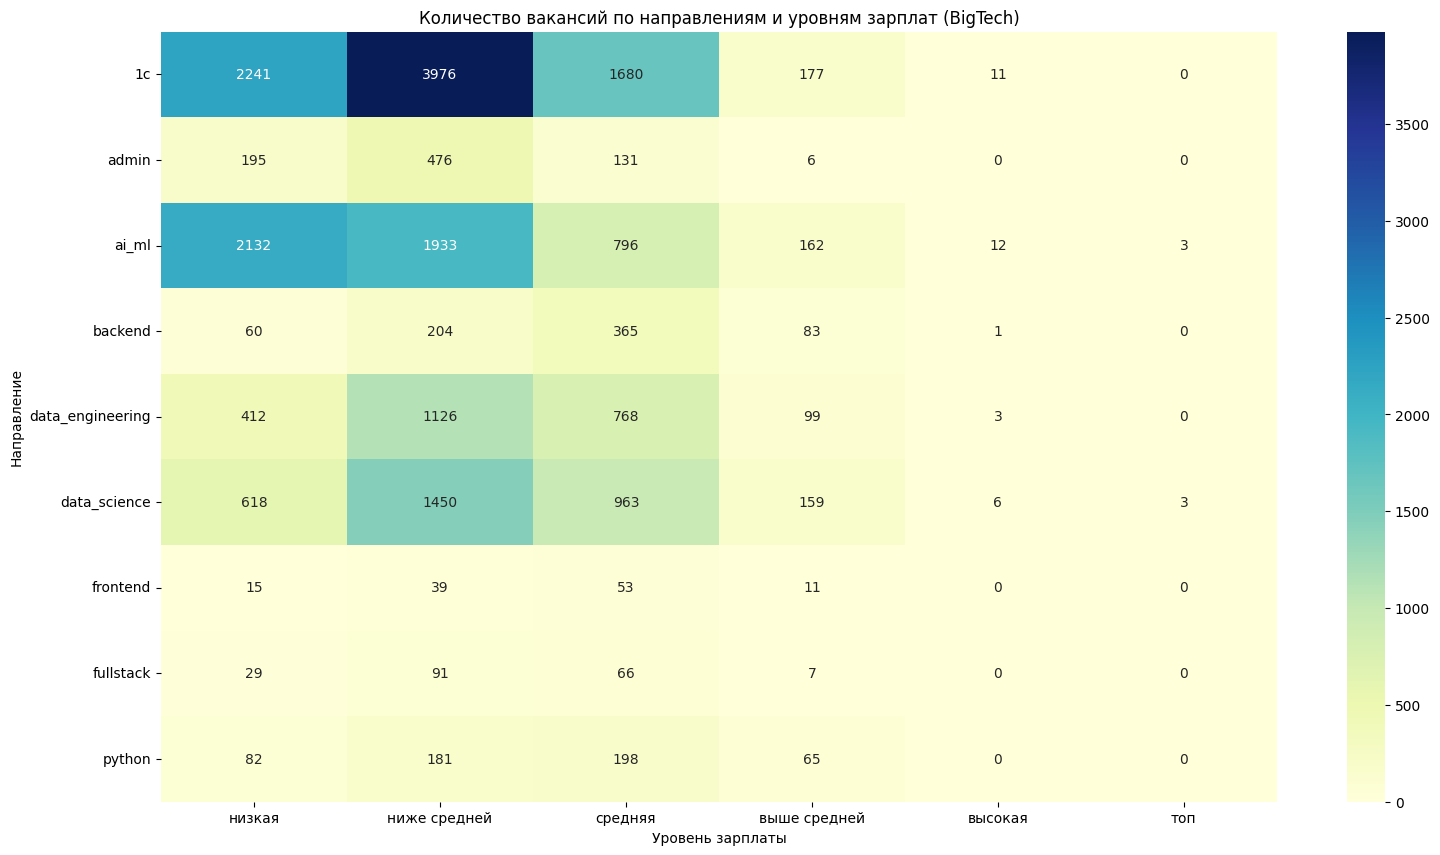

In [ ]:

pivot_table = (
    data_clean
    .pivot_table(
        index='search_query',
        columns='salary_level',
        values='id',
        aggfunc='count',

        observed=False
    )
)

plt.figure(figsize=(18,10))
sns.heatmap(
    pivot_table,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu'
)
plt.title('Количество вакансий по направлениям и уровням зарплат (BigTech)')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Направление')

plt.show()


Благодаря данному графику можно понять, сколько вакансий на каждом уровне зарплаты в каждом направлении.

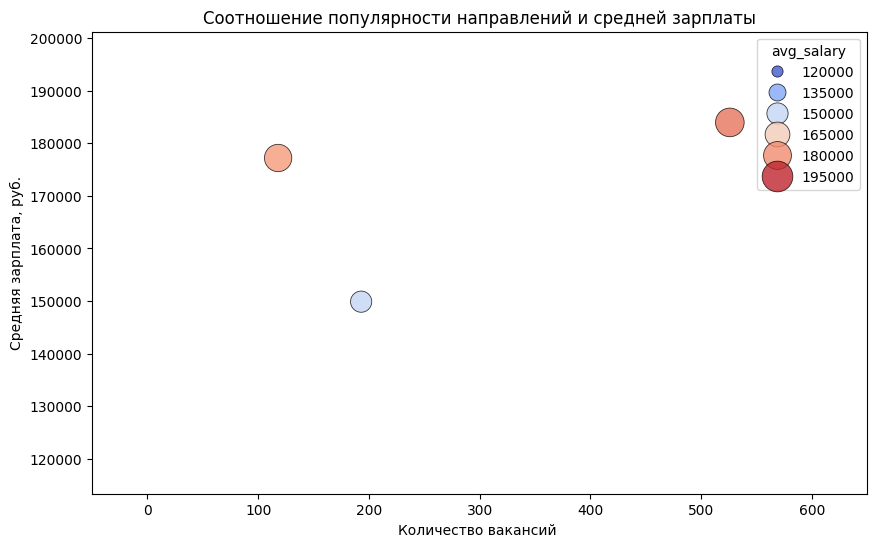

In [ ]:

query_stats = (
    data_clean.groupby('search_query')
    .agg(
        avg_salary=('avg_salary', 'mean'),
        vacancy_count=('id', 'nunique')
    )
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=query_stats,
    x='vacancy_count',
    y='avg_salary',
    size='avg_salary',
    hue='avg_salary',
    palette='coolwarm',
    sizes=(50, 500),
    alpha=0.8,
    edgecolor='black'
)
plt.xlim(-50, 650)
plt.title('Соотношение популярности направлений и средней зарплаты')
plt.xlabel('Количество вакансий ')
plt.ylabel('Средняя зарплата, руб.')

plt.show()


Этот график показывает, какие направления переполнены вакансиями, но с невысокой оплатой,
а какие — наоборот, редкие и дорогие

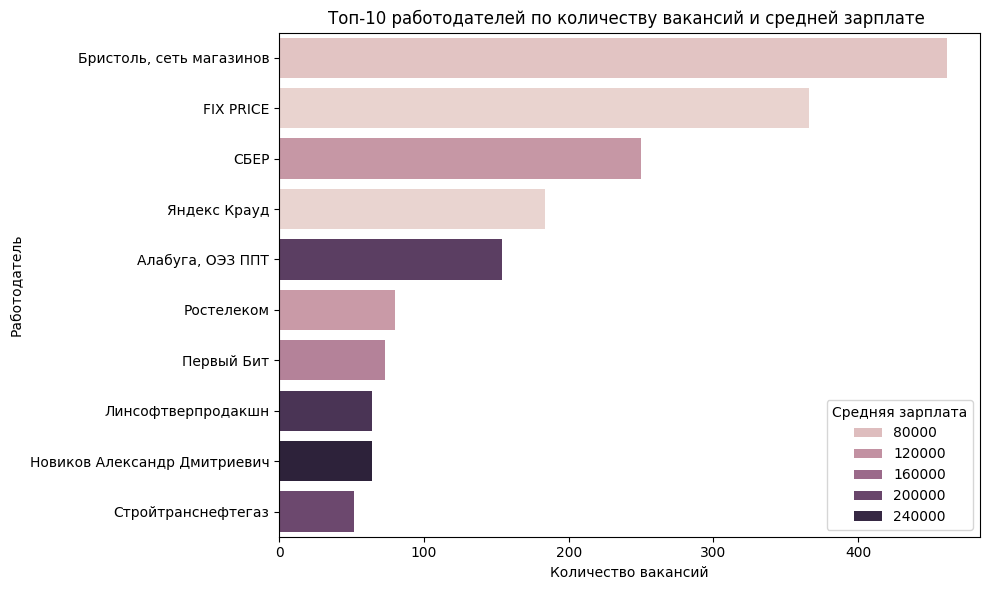

In [ ]:

employer_stats = (
    data_clean.groupby('employer')
    .agg(
        avg_salary=('avg_salary', 'mean'),
        vacancy_count=('id', 'nunique')
    )
    .reset_index()
    .sort_values('vacancy_count', ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=employer_stats,
    x='vacancy_count',
    y='employer',
    hue='avg_salary'
)
plt.title('Топ-10 работодателей по количеству вакансий и средней зарплате ')
plt.xlabel('Количество вакансий')
plt.ylabel('Работодатель')
plt.legend(title='Средняя зарплата', loc='lower right')
plt.tight_layout()
plt.show()


Исходя из графика можно понять, какие компании активнее нанимают и сколько платят в среднем

In [ ]:


city_direction_stats = (
    data_clean.groupby(['city', 'search_query'])
    .agg(
        avg_salary=('avg_salary', 'mean'),
        vacancy_count=('id', 'nunique')
    )
    .reset_index()
)

fig = px.scatter(
    city_direction_stats,
    x='avg_salary',
    y='city',
    size='vacancy_count',
    color='search_query',
    hover_name='search_query',
    hover_data={
        'avg_salary': True,
        'vacancy_count': True,
        'city': False
    },
    size_max=40,
    title='Сравнение зарплат по городам и направлениям',
)

fig.update_layout(
    xaxis_title='Средняя зарплата, руб.',
    yaxis_title='Город',
    legend_title_text='Направление (search_query)',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


In [ ]:

fig = px.box(
    data_clean,
    x='employment',
    y='avg_salary',
    color='search_query',
    points='all',
    hover_data=['city', 'employer', 'avg_salary'],
    title='Распределение зарплат по уровням занятости и направлениям'
)

fig.update_layout(
    yaxis_title='Средняя зарплата, руб.',
    xaxis_title='Уровень занятости',
    boxmode='group',
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()


In [ ]:


salary_category_stats = (
    data_clean['salary_level']
    .value_counts()
    .reset_index()
    )

fig = px.pie(
    salary_category_stats,
    names='salary_level',
    values='count',
    title='Распределение вакансий по зарплатным категориям',
    hover_data={'count': True}
)

fig.update_traces(textposition='inside')

fig.show()


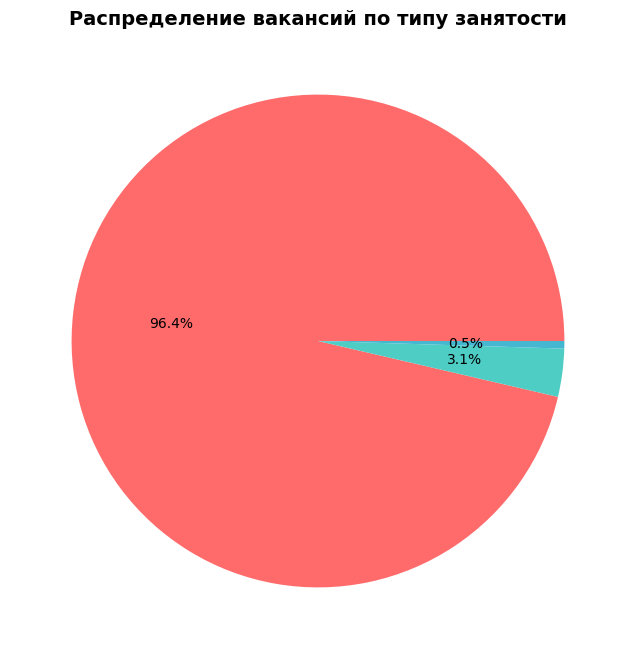

Количество вакансий по типам занятости:
Полная занятость: 20320 вакансий
Частичная занятость: 664 вакансий
Проектная работа: 104 вакансий


In [ ]:
employment_counts = data_clean['employment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(
    employment_counts.values,
    autopct='%1.1f%%',
    colors=['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57']
)
plt.title('Распределение вакансий по типу занятости', fontsize=14, fontweight='bold')
plt.show()
print("Количество вакансий по типам занятости:")
for employment_type, count in employment_counts.items():
    print(f"{employment_type}: {count} вакансий")

In [ ]:
data_clean['published_at'] = pd.to_datetime(data_clean['published_at']).dt.date
data_clean




,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,url,salary_level
3,126311801,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,data_science,Полная занятость,Гибрид,2025-10-08,https://hh.ru/vacancy/126311801,выше средней
5,126718438,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,data_science,Полная занятость,Гибрид,2025-11-01,https://hh.ru/vacancy/126718438,ниже средней
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,data_science,Полная занятость,Удалённая,2025-10-28,https://hh.ru/vacancy/127063385,ниже средней
9,126970916,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,data_science,Полная занятость,Удалённая,2025-10-27,https://hh.ru/vacancy/126970916,средняя
14,127181192,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,data_science,Полная занятость,Удалённая,2025-10-31,https://hh.ru/vacancy/127181192,выше средней
...,...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,admin,Полная занятость,Очная,2025-11-01,https://hh.ru/vacancy/125639010,ниже средней
39609,125938955,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,admin,Полная занятость,Очная,2025-10-22,https://hh.ru/vacancy/125938955,ниже средней
39610,126696734,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,admin,Полная занятость,Очная,2025-10-27,https://hh.ru/vacancy/126696734,низкая
39611,124687789,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,admin,Полная занятость,Очная,2025-10-27,https://hh.ru/vacancy/124687789,низкая


тут сделали по нормальному дату

/tmp/ipython-input-3762387299.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



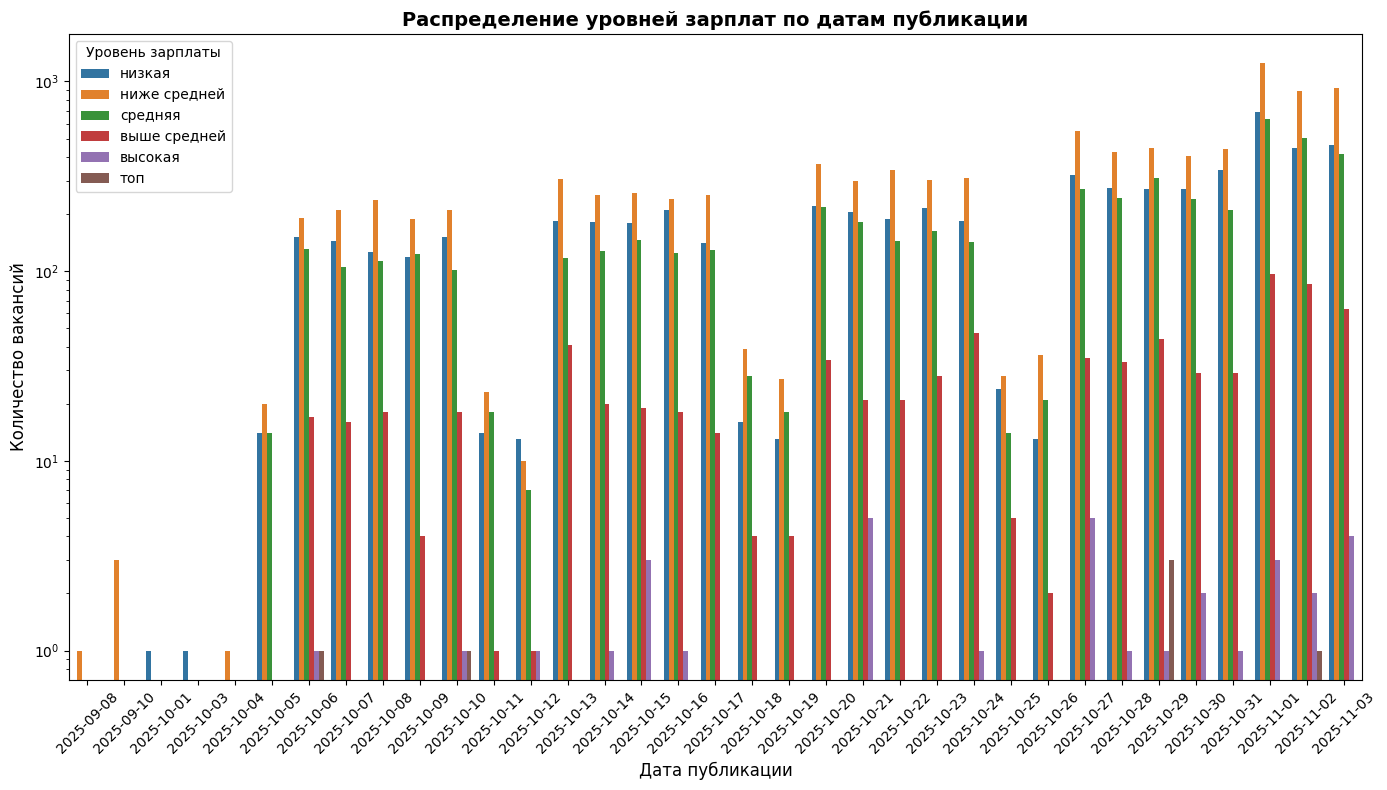

In [ ]:
grouped_data = data_clean.groupby(['published_at', 'salary_level']).size().reset_index(name='count')

plt.figure(figsize=(14, 8))
sns.barplot(
    data=grouped_data,
    x='published_at',
    y='count',
    hue='salary_level'
)
plt.yscale('log')
plt.title('Распределение уровней зарплат по датам публикации', fontsize=14, fontweight='bold')
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')

plt.tight_layout()
plt.show()

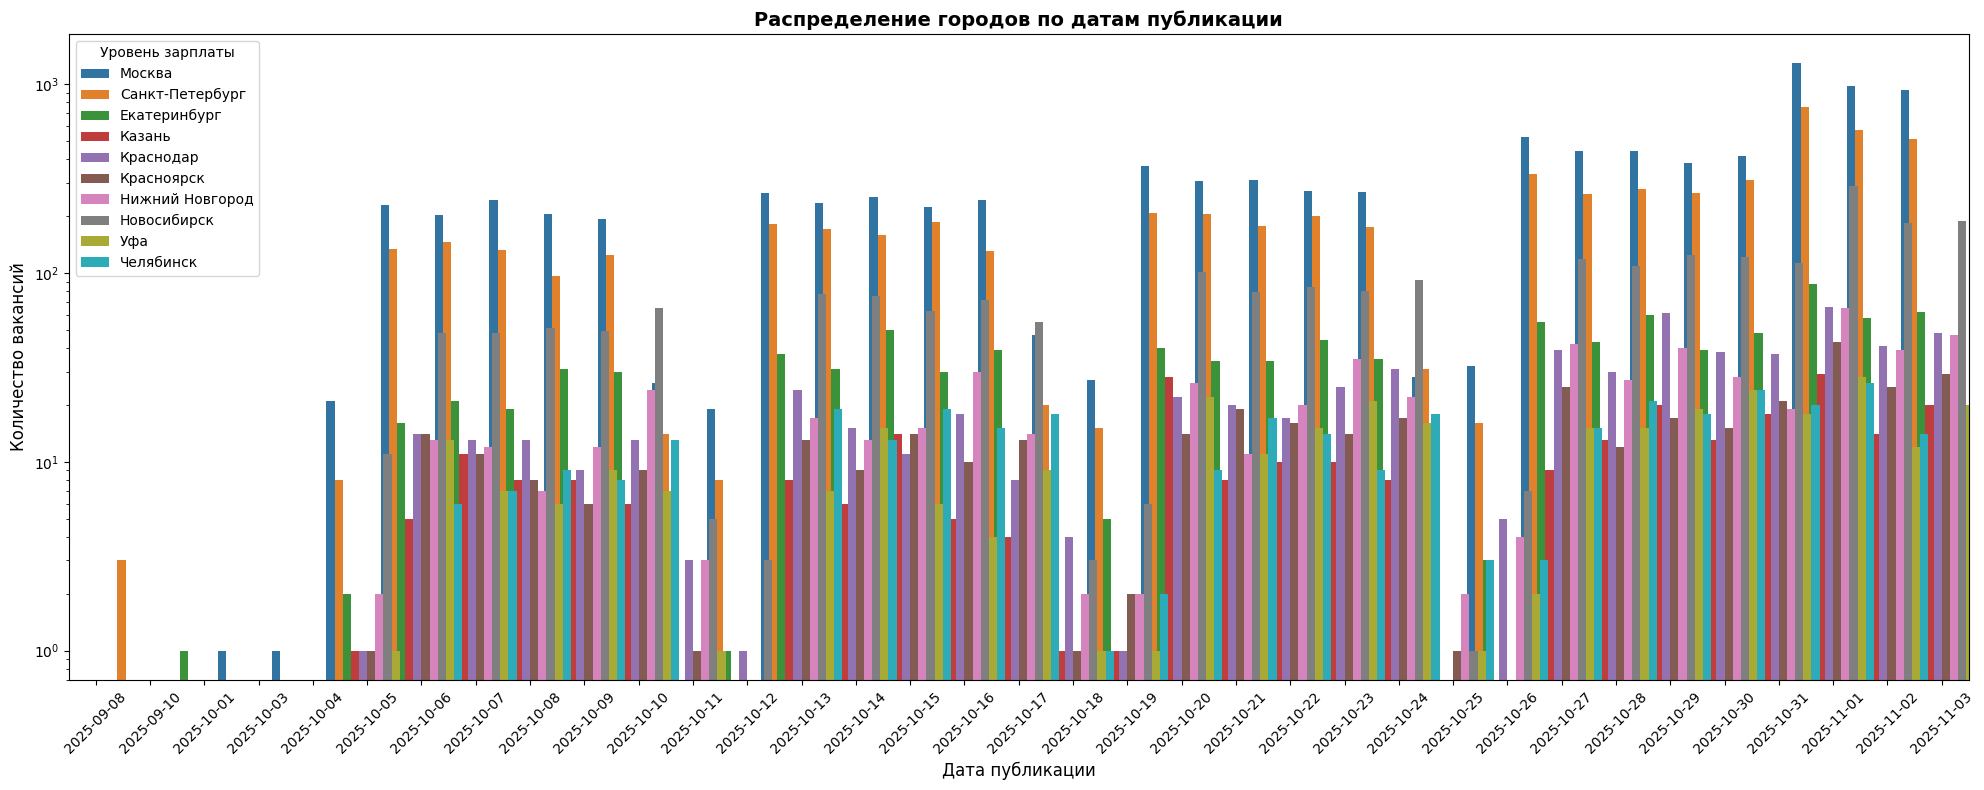

In [ ]:
grouped_data = data_clean.groupby(['published_at', 'city']).size().reset_index(name='count')

plt.figure(figsize=(20, 8))

sns.barplot(
    data=grouped_data,
    x='published_at',
    y='count',
    hue='city',
    width=1.5,

)
plt.yscale('log')
plt.title('Распределение городов по датам публикации', fontsize=14, fontweight='bold')
plt.xlabel('Дата публикации', fontsize=12)
plt.ylabel('Количество вакансий', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Уровень зарплаты')
plt.tight_layout()
plt.show()

In [ ]:
uniq_year=sorted(data_clean['published_at'].unique())
uniq_city=sorted(data_clean['city'].unique())
frame=[[],[],[]]
for year in uniq_year:
  data_sorted_now=data_clean[data_clean['published_at'] == year]
  uniq_city=sorted(data_clean['city'].unique())
  for city in uniq_city:
    frame[0].append(year)
    frame[1].append(city)
    count = (data_sorted_now['city'] == city).sum()
    frame[2].append(count)
final = pd.DataFrame({'Year': frame[0], 'city': frame[1], 'Count': frame[2]})
fig = px.bar(final, x='city', y='Count', color='city',animation_frame='Year',title='Количество открытых вакансий по дням',
           range_y=[0, final['Count'].max()]
            )
fig.show()

In [ ]:
#data_clean[data_clean['published_at']== '2025-10-04']
from datetime import datetime

filtered_data = data_clean[pd.to_datetime(data_clean['published_at']) < datetime(2025, 10, 4)]
filtered_data

,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,url,salary_level
5670,124982719,Персональный водитель,[],127500.0,Дежурный по Бизнесу,Москва,ai_ml,Полная занятость,Очная,2025-09-08,https://hh.ru/vacancy/124982719,ниже средней
20669,124438728,Junior маркетолог,"[ml, analytics, hard, soft, marketing]",75000.0,ДиГрей Эстейт технолоджи,Москва,1c,Полная занятость,Очная,2025-10-03,https://hh.ru/vacancy/124438728,низкая
27186,125151566,Менеджер по развитию объектов сети «Квадрошина»,[],100000.0,JS-service,Санкт-Петербург,fullstack,Полная занятость,Очная,2025-09-10,https://hh.ru/vacancy/125151566,ниже средней
27200,125151556,Руководитель отдела продаж (магазин легковых шин),"[hard, sales, marketing]",120000.0,JS-service,Санкт-Петербург,fullstack,Полная занятость,Очная,2025-09-10,https://hh.ru/vacancy/125151556,ниже средней
27545,125151575,Системный администратор,[],100000.0,Отель Костас,Санкт-Петербург,admin,Полная занятость,Очная,2025-09-10,https://hh.ru/vacancy/125151575,ниже средней
35312,123590540,Обрубщик ( зачистка металла),[],80000.0,Строп-комплект,Екатеринбург,ai_ml,Полная занятость,Очная,2025-10-01,https://hh.ru/vacancy/123590540,низкая


ну тут можно какие то выводы сделать что вот и долбебы вакансии неправильно ставят и хуево заполняют заявки

*Корреляции*

In [ ]:
from datetime import datetime
current_date = datetime(2025, 11, 4)
df_corr = data_clean
df_corr['published_at'] = pd.to_datetime(df_corr['published_at'])
days_ago = (current_date - df_corr['published_at']).dt.days
def date(days):
    if days == 0:
        return 'today'
    elif days <= 1:
        return '1_day'
    elif days <= 7:
        return '1_week'
    elif days <= 30:
        return '1_month'
    elif days <= 60:
        return '2_months'
    else:
        return 'more_than_2_months'

df_corr['time_period'] = days_ago.apply(date)
time_period_encoded = {
    'today': 0,
    '1_day': 1,
    '1_week': 2,
    '1_month': 3,
    '2_months': 4,
    'more_than_2_months': 5
}
df_corr['time_period_encoded'] = df_corr['time_period'].map(time_period_encoded)

cities = df_corr['city'].unique()
city_dict = {}
for i, city in enumerate(sorted(cities)):
    city_dict[city] = i
df_corr['city_encoded'] = df_corr['city'].apply(lambda x: city_dict[x])


skills_list = ['programming', 'ml', 'dataeng', 'analytics', 'devops', 'hard',
              'soft', 'management', 'hr', 'sales', 'design', 'support',
              'marketing', 'qa']
for skill in skills_list:
    df_corr[f'skill_{skill}'] = df_corr['description'].apply(
        lambda x: 1 if skill in str(x).lower() else 0
    )

remote_dict = {
    'Удалённая': 0,
    'Гибрид': 1,
    'Очная': 2
}
df_corr['remote_encoded'] = df_corr['remote'].apply(lambda x: remote_dict[x])

employment_dict = {
    'Частичная занятость': 0,
    'Проектная работа': 1,
    'Полная занятость': 2
}
df_corr['employment_encoded'] = df_corr['employment'].apply(lambda x: employment_dict[x])

search_query_dict = {
    'data_science': 0,
    'data_engineering': 1,
    'ai_ml': 2,
    '1c': 3,
    'python': 4,
    'backend': 5,
    'frontend': 6,
    'fullstack': 7,
    'admin': 8
}

existing_queries = df_corr['search_query'].unique()
actual_search = {}
for name, k in search_query_dict.items():
    if name in existing_queries:
        actual_search[name] = k
df_corr['search_query_encoded'] = df_corr['search_query'].apply(lambda x: actual_search[x])
salary_level_map = {
    'низкая': 1,
    'ниже средней': 2,
    'средняя': 3,
    'выше средней': 4,
    'высокая': 5,
    'топ': 6
}
df_corr['salary_level_encoded'] = df_corr['salary_level'].apply(lambda x: salary_level_map[x])

df_corr

,id,title,description,avg_salary,employer,city,search_query,employment,remote,published_at,...,skill_hr,skill_sales,skill_design,skill_support,skill_marketing,skill_qa,remote_encoded,employment_encoded,search_query_encoded,salary_level_encoded
3,126311801,Системный аналитик,"[analytics, soft, support]",400000.0,Bgstaff,Москва,data_science,Полная занятость,Гибрид,2025-10-08,...,0,0,0,1,0,0,1,2,0,4
5,126718438,Data Scientist (Junior),"[programming, ml, support]",100000.0,BND LLC,Москва,data_science,Полная занятость,Гибрид,2025-11-01,...,0,0,0,1,0,0,1,2,0,2
8,127063385,"Junior Data Scientist (Python, ML) / Дата-сайе...","[programming, ml, analytics, soft]",90000.0,Rubbles,Москва,data_science,Полная занятость,Удалённая,2025-10-28,...,0,0,0,0,0,0,0,2,0,2
9,126970916,Ведущий разработчик искусственного интеллекта/...,"[ml, analytics, hard, support]",180000.0,Геномед,Москва,data_science,Полная занятость,Удалённая,2025-10-27,...,0,0,0,1,0,0,0,2,0,3
14,127181192,Data Scientist,"[ml, dataeng]",325000.0,LIAN,Москва,data_science,Полная занятость,Удалённая,2025-10-31,...,0,0,0,0,0,0,0,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39608,125639010,Ведущий системный администратор,[analytics],115000.0,ГК Планета Авто,Челябинск,admin,Полная занятость,Очная,2025-11-01,...,0,0,0,0,0,0,2,2,8,2
39609,125938955,Ведущий системный администратор,[],100000.0,Уральский Комплектующий Завод,Челябинск,admin,Полная занятость,Очная,2025-10-22,...,0,0,0,0,0,0,2,2,8,2
39610,126696734,Ведущий инженер отдела информационных технологий,"[devops, support]",70000.0,НПО СПЛАВ им. А. Н. Ганичева,Челябинск,admin,Полная занятость,Очная,2025-10-27,...,0,0,0,1,0,0,2,2,8,1
39611,124687789,Системный администратор (ведущий инженер отдел...,"[soft, support]",55000.0,ОГКУ Центр Информационно-Технического Обслужив...,Челябинск,admin,Полная занятость,Очная,2025-10-27,...,0,0,0,1,0,0,2,2,8,1


In [ ]:
df_corr.info()
start_column = 'time_period_encoded'
corr_columns = df_corr.columns[df_corr.columns.get_loc(start_column):]
correlation_matrix = df_corr[corr_columns].corr()
correlation_matrix

<class 'pandas.core.frame.DataFrame'>
Index: 21088 entries, 3 to 39612
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    21088 non-null  int64         
 1   title                 21088 non-null  object        
 2   description           21088 non-null  object        
 3   avg_salary            21088 non-null  float64       
 4   employer              21088 non-null  object        
 5   city                  21088 non-null  object        
 6   search_query          21088 non-null  object        
 7   employment            21088 non-null  object        
 8   remote                21088 non-null  object        
 9   published_at          21088 non-null  datetime64[ns]
 10  url                   21088 non-null  object        
 11  salary_level          21088 non-null  category      
 12  time_period           21088 non-null  object        
 13  time_period_encoded  

,time_period_encoded,city_encoded,skill_programming,skill_ml,skill_dataeng,skill_analytics,skill_devops,skill_hard,skill_soft,skill_management,skill_hr,skill_sales,skill_design,skill_support,skill_marketing,skill_qa,remote_encoded,employment_encoded,search_query_encoded,salary_level_encoded
time_period_encoded,1.000000,-0.005177,0.008853,-0.000411,0.007941,-0.012221,-0.007142,-0.017794,-0.001027,-0.005988,-0.010892,-0.059409,-0.008331,0.019018,-0.025963,0.004685,0.016161,-0.007858,-0.008204,-0.017744
city_encoded,-0.005177,1.000000,-0.052847,-0.062741,-0.020474,-0.073230,-0.034626,-0.018997,-0.013144,0.002460,0.020817,0.013626,-0.036583,-0.017586,-0.045522,-0.019138,0.109568,0.033219,0.083505,-0.092651
skill_programming,0.008853,-0.052847,1.000000,0.159561,0.114828,0.116318,0.155994,-0.057760,0.022537,-0.022509,-0.037993,-0.045377,0.049196,0.066716,-0.031948,0.094719,-0.174849,-0.034222,0.187553,0.150138
skill_ml,-0.000411,-0.062741,0.159561,1.000000,0.073355,0.065635,0.058496,0.057203,0.008238,-0.019001,-0.007051,-0.020574,0.228767,-0.024268,0.210691,0.011320,-0.250209,-0.084122,0.005106,0.005267
skill_dataeng,0.007941,-0.020474,0.114828,0.073355,1.000000,0.131526,0.094995,-0.007054,0.019224,-0.001902,-0.007293,-0.034396,-0.011091,0.029449,-0.014138,0.024620,-0.087415,0.006072,-0.043806,0.099367
skill_analytics,-0.012221,-0.073230,0.116318,0.065635,0.131526,1.000000,0.089436,0.123483,0.139962,0.104250,0.000849,0.080478,0.008788,-0.027835,0.209503,0.092159,-0.226537,0.016058,-0.342877,0.129059
skill_devops,-0.007142,-0.034626,0.155994,0.058496,0.094995,0.089436,1.000000,0.010273,0.040671,0.029225,-0.027222,-0.036893,0.025626,0.114962,0.030610,0.072165,-0.114846,0.008838,0.143195,0.113581
skill_hard,-0.017794,-0.018997,-0.057760,0.057203,-0.007054,0.123483,0.010273,1.000000,0.056226,0.026436,-0.012239,0.072720,0.030675,-0.089539,0.354660,-0.014328,-0.038879,0.004370,-0.082792,-0.019850
skill_soft,-0.001027,-0.013144,0.022537,0.008238,0.019224,0.139962,0.040671,0.056226,1.000000,0.534321,0.057556,0.049288,0.038004,-0.021564,0.054292,0.035512,-0.074008,0.029035,-0.043123,0.106856
skill_management,-0.005988,0.002460,-0.022509,-0.019001,-0.001902,0.104250,0.029225,0.026436,0.534321,1.000000,0.076626,0.075895,0.012115,-0.009455,0.044855,0.014468,-0.028754,0.036555,-0.024318,0.109451


In [ ]:
start_column = 'time_period_encoded'
corr_columns = df_corr.columns[df_corr.columns.get_loc(start_column):]
df_with_fullpart=df_corr[df_corr['employment']=='Полная занятость']
correlation_matrix = df_with_fullpart[corr_columns].corr()
correlation_matrix

,time_period_encoded,city_encoded,skill_programming,skill_ml,skill_dataeng,skill_analytics,skill_devops,skill_hard,skill_soft,skill_management,skill_hr,skill_sales,skill_design,skill_support,skill_marketing,skill_qa,remote_encoded,employment_encoded,search_query_encoded,salary_level_encoded
time_period_encoded,1.000000,-0.005205,0.013981,0.003072,0.006418,-0.012270,-0.007319,-0.019767,-0.002543,-0.005083,-0.011325,-0.061811,-0.009212,0.021389,-0.027944,0.003657,0.016692,NaN,-0.007437,-0.021331
city_encoded,-0.005205,1.000000,-0.050333,-0.057797,-0.021918,-0.075291,-0.035167,-0.019976,-0.014729,0.001626,0.022910,0.012147,-0.035013,-0.019106,-0.043060,-0.020902,0.105558,NaN,0.086119,-0.098794
skill_programming,0.013981,-0.050333,1.000000,0.156797,0.118240,0.118891,0.160789,-0.054949,0.024428,-0.022005,-0.038398,-0.042421,0.047163,0.067041,-0.028001,0.098936,-0.165941,NaN,0.184104,0.161475
skill_ml,0.003072,-0.057797,0.156797,1.000000,0.080679,0.073879,0.059134,0.061362,0.012303,-0.014139,-0.007191,-0.017135,0.223790,-0.020567,0.200547,0.016174,-0.231030,NaN,0.006249,0.024936
skill_dataeng,0.006418,-0.021918,0.118240,0.080679,1.000000,0.132540,0.098506,-0.006351,0.019522,-0.002882,-0.006752,-0.034778,-0.010261,0.029755,-0.013161,0.025300,-0.090127,NaN,-0.042281,0.099797
skill_analytics,-0.012270,-0.075291,0.118891,0.073879,0.132540,1.000000,0.092480,0.121100,0.142076,0.105085,0.002452,0.078194,0.011404,-0.029223,0.213434,0.093339,-0.236718,NaN,-0.342862,0.135059
skill_devops,-0.007319,-0.035167,0.160789,0.059134,0.098506,0.092480,1.000000,0.009430,0.039181,0.029772,-0.026514,-0.038921,0.026274,0.117392,0.032842,0.071538,-0.120046,NaN,0.144139,0.117905
skill_hard,-0.019767,-0.019976,-0.054949,0.061362,-0.006351,0.121100,0.009430,1.000000,0.055613,0.026268,-0.012930,0.072365,0.029925,-0.091128,0.355659,-0.014019,-0.037563,NaN,-0.079460,-0.018792
skill_soft,-0.002543,-0.014729,0.024428,0.012303,0.019522,0.142076,0.039181,0.055613,1.000000,0.534494,0.056074,0.046661,0.039330,-0.024224,0.055582,0.036381,-0.081311,NaN,-0.043798,0.111555
skill_management,-0.005083,0.001626,-0.022005,-0.014139,-0.002882,0.105085,0.029772,0.026268,0.534494,1.000000,0.075306,0.074046,0.012543,-0.011433,0.046996,0.014339,-0.036705,NaN,-0.024832,0.112318


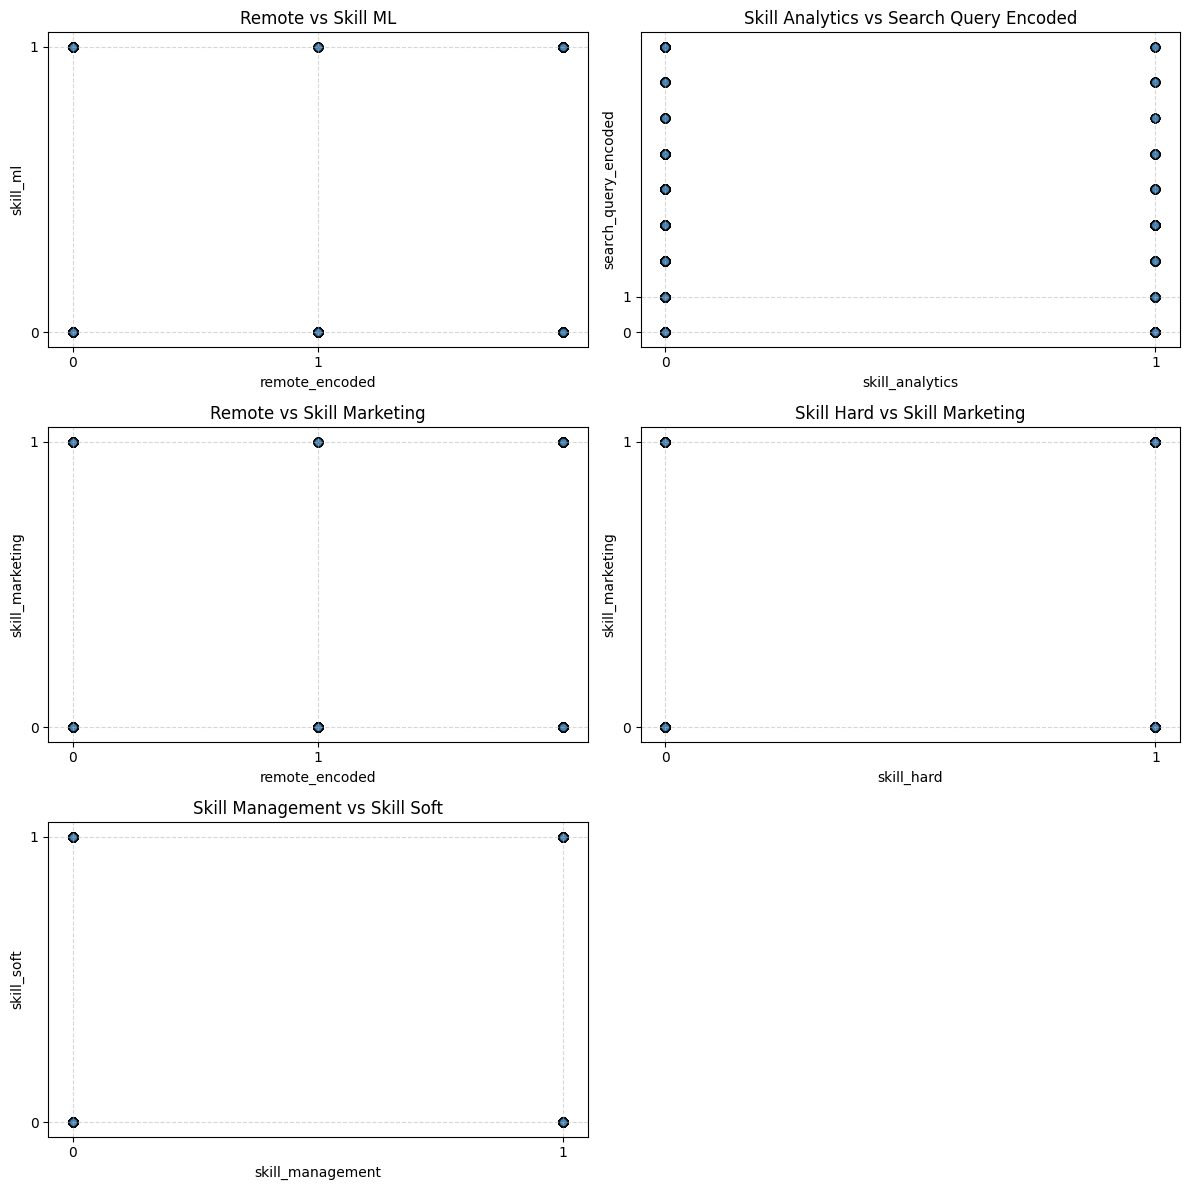

In [ ]:
import matplotlib.pyplot as plt

# Список пар для графиков
scatter_pairs = [
    ('remote_encoded', 'skill_ml', 'Remote vs Skill ML'),
    ('skill_analytics', 'search_query_encoded', 'Skill Analytics vs Search Query Encoded'),
    ('remote_encoded', 'skill_marketing', 'Remote vs Skill Marketing'),
    ('skill_hard', 'skill_marketing', 'Skill Hard vs Skill Marketing'),
    ('skill_management', 'skill_soft', 'Skill Management vs Skill Soft')
]

# Размер сетки
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for i, (x_col, y_col, title) in enumerate(scatter_pairs):
    axes[i].scatter(df_corr[x_col], df_corr[y_col], alpha=0.6, color='steelblue', edgecolor='k')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(title)
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Убираем пустой subplot, если есть
if len(scatter_pairs) < len(axes):
    for j in range(len(scatter_pairs), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
